<a href="https://colab.research.google.com/github/LEESUAJE1978/data-analysis/blob/master/8%EA%B0%95_%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. 구글드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


1. 경로 지정

In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
%ls

 01.linear_regression.ipynb              'ex03_Linear Regression.ipynb'
 7강실습코드.ipynb                       'ex04_logistic Regression.ipynb'
'8강 실습코드.ipynb'                     'ex04_Logistic Regression.ipynb'
'9강 실습코드.ipynb'                     'ex05_mutinomial logistic.ipynb'
 Accidents0515.csv                        logistic_express.ipynb
 Casualties0515.csv                      'logistic regression.ipynb'
 class01.ipynb                            lstm.ipynb
 class02.ipynb                            statistics.ipynb
 class03.ipynb                            SWEETVIZ_REPORT.gdoc
 class04.ipynb                            SWEETVIZ_REPORT.html
 class05.ipynb                            test_accident.csv
'Copy of ex01_hello'                      test_dataset.xlsx
 covid19-countries-statistical-dataset/   Untitled0.ipynb
 data/                                    Untitled1.ipynb
 data-03-diabetes.csv                     Untitled2.ipynb
 data1/                        

2. 패키지 불러오기

In [ ]:
import datetime as dt #시간데이터 활용
import pandas as pd # 데이터 EDA 
import matplotlib.pyplot as plt #시각화
import numpy as np #데이터 
import seaborn as sns #데이터 시각화
plt.style.use('ggplot') #ggplot 스타일 데이터
%config InlineBackend.figure_format = 'retina'


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


3. 데이터 셋 불러오기

In [ ]:
accidents = pd.read_csv('Accidents0515.csv',index_col='Accident_Index')
casualties=pd.read_csv('Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles=pd.read_csv('Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

4. 데이터 탐색(Exploratory Data Analysis)

4.1.데이터 셋 병합


In [ ]:
accidents.shape

(1780653, 31)

In [ ]:
casualties.shape

(2216720, 14)

In [ ]:
vehicles.shape

(3004425, 21)

In [ ]:
accidents  = accidents.join(vehicles, how = 'outer') #outer join 형식으로 accidents 데이터 셋과 vehicles 데이터 셋 결합
accidents

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849,1.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909,1.0,11.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,1.0,11.0,0.0,17.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,2.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840,1.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015984139115,312087.0,570791.0,-3.376671,55.023855,98,3,3,1,11/12/2015,6,13:24,917,S12000006,3,75,6,60,0,-1,-1,0,0,0,1,1,2,0,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015984139715,320671.0,569791.0,-3.242159,55.016316,98,3,2,1,02/12/2015,4,13:50,917,S12000006,4,722,6,60,3,4,6,0,0,0,1,1,2,0,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015984140215,311731.0,586343.0,-3.387067,55.163502,98,2,1,4,23/12/2015,4,00:01,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,4,2,0,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
accidents.join(vehicles,how = 'inner') #inner join 방식 비교

4.2. 불필요 데이터 제거

In [ ]:
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control' ,'2nd_Road_Class'], axis=1, inplace=True) #컬럼 제거

4.3. 기초통계량 확인

In [ ]:
pd.options.display.float_format = '{:.1f}'.format #과학적 숫자가 아닌 소수점으로 표현하기
accidents.describe() #excluded NaN

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
count,3144256.0,3144256.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3144481.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0,3004425.0
mean,-1.4,52.6,30.6,2.8,2.1,1.4,4.1,352.4,4.0,1002.5,5.1,39.5,2.4,390.9,0.0,0.7,1.9,1.6,1.4,0.1,0.1,1.4,1.2,1.6,9.7,0.0,12.7,0.1,2.5,0.2,0.3,0.4,0.6,1.8,1.0,8.7,1.4,34.3,5.8,1411.7,0.8,4.8,3.6,0.9
std,1.4,1.4,25.1,0.4,0.9,1.0,1.9,255.8,1.4,1811.4,1.7,14.4,2.6,1318.1,0.1,1.8,1.6,1.6,0.6,0.7,0.6,0.5,0.4,0.8,8.3,0.3,6.2,1.0,3.2,0.7,1.6,1.4,2.1,1.2,0.2,6.0,0.6,19.4,2.9,1692.2,1.2,5.3,3.7,1.1
min,-7.5,49.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-2.3,51.5,7.0,3.0,2.0,1.0,3.0,124.0,3.0,0.0,6.0,30.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,9.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,22.0,5.0,-1.0,-1.0,-1.0,-1.0,1.0
50%,-1.4,52.3,31.0,3.0,2.0,1.0,4.0,329.0,3.0,130.0,6.0,30.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,9.0,0.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,34.0,6.0,1388.0,1.0,4.0,3.0,1.0
75%,-0.2,53.5,46.0,3.0,2.0,2.0,6.0,530.0,6.0,706.0,6.0,50.0,3.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0,9.0,0.0,18.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0,1.0,15.0,2.0,47.0,8.0,1896.0,1.0,9.0,7.0,1.0
max,1.8,60.8,98.0,3.0,67.0,93.0,7.0,941.0,6.0,9999.0,9.0,70.0,9.0,9999.0,2.0,8.0,7.0,9.0,5.0,7.0,7.0,3.0,3.0,91.0,98.0,5.0,18.0,9.0,8.0,5.0,12.0,8.0,11.0,4.0,2.0,15.0,3.0,100.0,11.0,99999.0,12.0,111.0,10.0,3.0


4.4.결측치 확인 및 제거

In [ ]:
accidents.isna().sum()

In [ ]:
accidents.dropna(inplace=True)
print(accidents.shape) #결측치 제거 inplace는 데이터 셋 재귀

(3004005, 47)


In [ ]:
for col in accidents.columns:
  a = accidents[accidents[col]==-1] #값에 -1을 가지고 있는 데이터 확인, 554174개 값 제거 필요
a.shape

(588611, 47)

In [ ]:
for col in accidents.columns:
  accidents = accidents[accidents[col]!=-1] #값에 -1을 가지고 있는 데이터 제거

print(accidents)

                Longitude  Latitude  ...  Driver_IMD_Decile  Driver_Home_Area_Type
Accident_Index                       ...                                          
200501BS00003        -0.2      51.5  ...                2.0                    1.0
200501BS00003        -0.2      51.5  ...                1.0                    1.0
200501BS00004        -0.2      51.5  ...                2.0                    1.0
200501BS00006        -0.2      51.5  ...                4.0                    1.0
200501BS00006        -0.2      51.5  ...                1.0                    1.0
...                   ...       ...  ...                ...                    ...
2015984139115        -3.4      55.0  ...                nan                    nan
2015984139715        -3.2      55.0  ...                nan                    nan
2015984140215        -3.4      55.2  ...                nan                    nan
2015984140515        -3.1      55.0  ...                nan                    nan
2015

4.5. 날짜 데이터 변환

In [ ]:
accidents['Date_time'] = accidents['Date']+ ' ' +accidents['Time'] #Date와 Time을 결합한 날짜시간 데이터 컬럼 생성
print(accidents['Date_time'])

Accident_Index
200501BS00003    06/01/2005 00:15
200501BS00003    06/01/2005 00:15
200501BS00004    07/01/2005 10:35
200501BS00006    11/01/2005 12:40
200501BS00006    11/01/2005 12:40
                       ...       
2015984139115    11/12/2015 13:24
2015984139715    02/12/2015 13:50
2015984140215    23/12/2015 00:01
2015984140515    26/12/2015 12:40
2015984141415    31/12/2015 16:37
Name: Date_time, Length: 1673770, dtype: object


In [ ]:
accidents['Date_Time'] = pd.to_datetime(accidents.Date_time) #날짜 시간 데이터 형식으로 변경
print(accidents['Date_Time'])

Accident_Index
200501BS00003   2005-06-01 00:15:00
200501BS00003   2005-06-01 00:15:00
200501BS00004   2005-07-01 10:35:00
200501BS00006   2005-11-01 12:40:00
200501BS00006   2005-11-01 12:40:00
                        ...        
2015984139115   2015-11-12 13:24:00
2015984139715   2015-02-12 13:50:00
2015984140215   2015-12-23 00:01:00
2015984140515   2015-12-26 12:40:00
2015984141415   2015-12-31 16:37:00
Name: Date_Time, Length: 1673770, dtype: datetime64[ns]


In [ ]:
accidents.drop(['Date','Time'], axis = 1, inplace = True) #날짜와 시간의 각 컬럼 제거

In [ ]:
accidents.shape

(1673770, 47)

5. 데이터 시각화(Data Visualization)

5.1. 요일별 사고건수 히스토그램

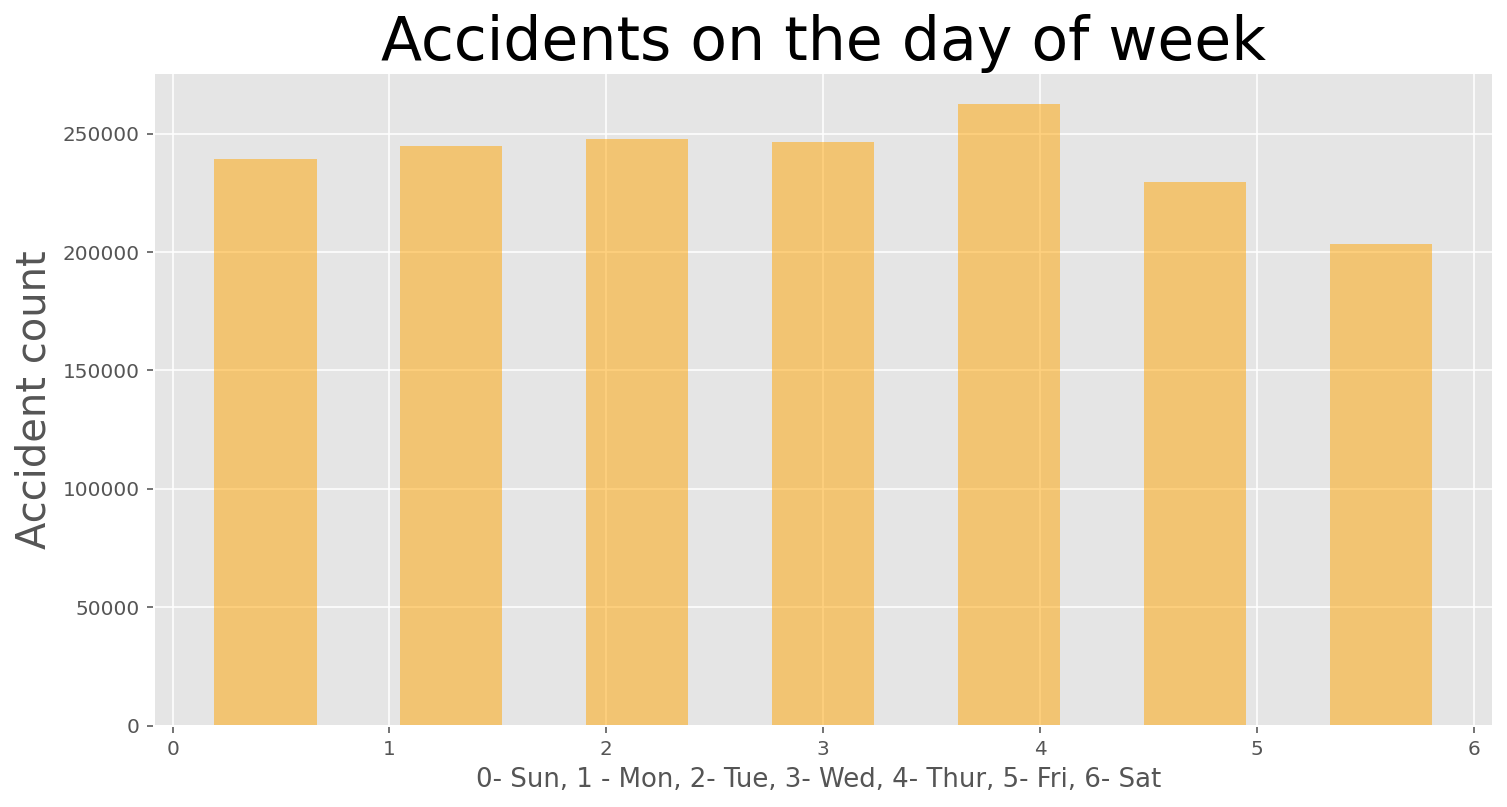

In [ ]:
plt.figure(figsize = (12,6))
accidents['Date_Time'].dt.dayofweek.hist(bins= 7, rwidth = 0.55, alpha =0.5, color = 'orange')
plt.title('Accidents on the day of week', fontsize = 30)
#plt.grid(False)
plt.ylabel('Accident count', fontsize = 20)
plt.xlabel('0- Sun, 1 - Mon, 2- Tue, 3- Wed, 4- Thur, 5- Fri, 6- Sat ', fontsize = 13)
plt.show()

5.2. 시간별 사고건수 히스토그램

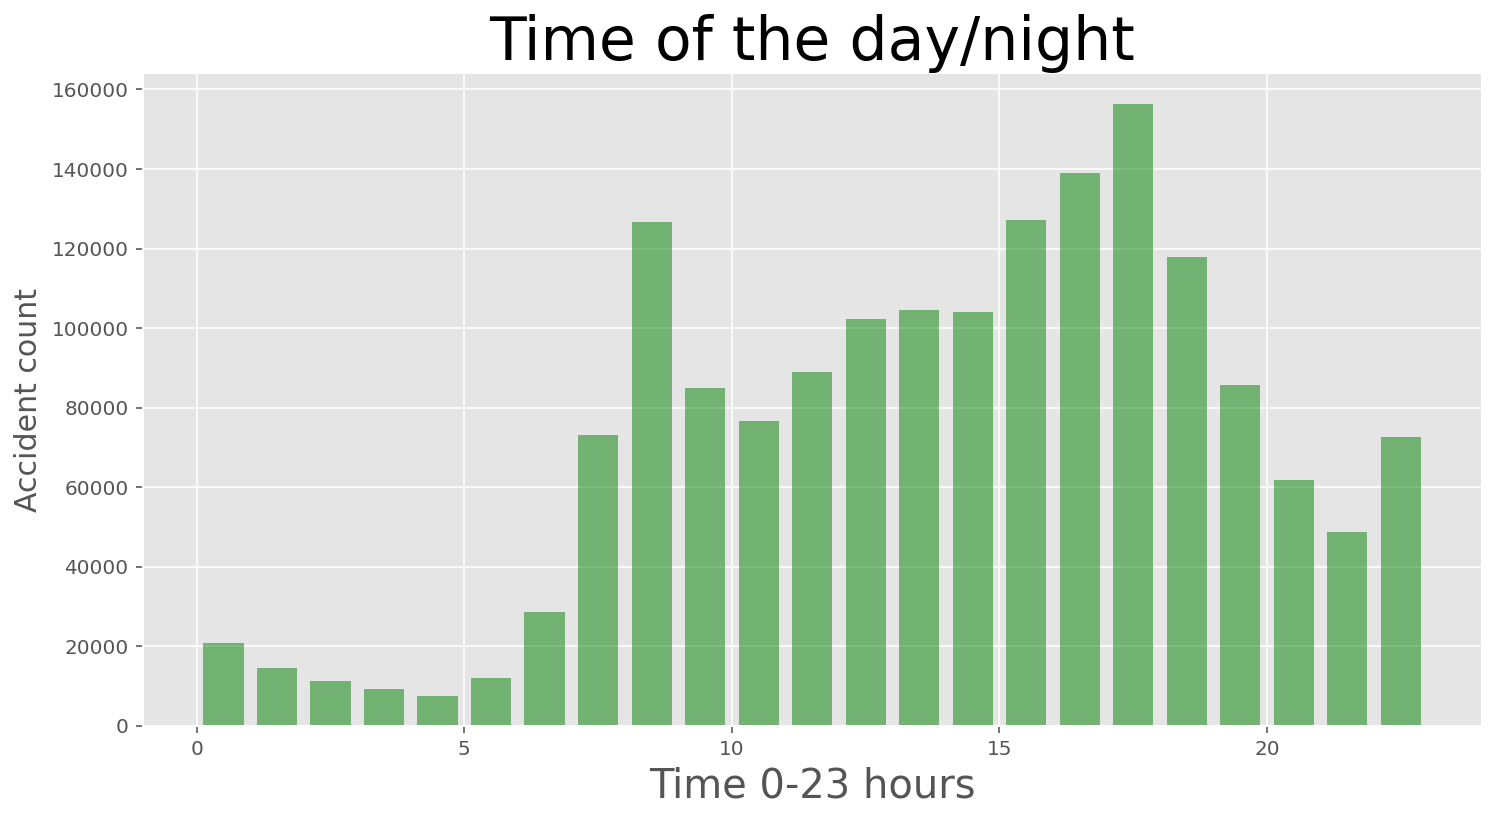

In [ ]:
plt.figure(figsize=(12,6))
accidents.Date_Time.dt.hour.hist(bins= 23, rwidth= 0.75,alpha =0.50, color= 'green')
plt.title('Time of the day/night',fontsize= 30)
#plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)
plt.show()

5.3. 나이별 사상자 히스토그램

In [ ]:
casualties['Age_Band_of_Casualty'].value_counts() #-1값 제거 필요

 6     416604
 7     359439
 4     325582
 5     281143
 8     260983
 9     158218
 3     105167
 10     87441
 11     72506
 2      63913
-1      45920
 1      39804
Name: Age_Band_of_Casualty, dtype: int64

In [ ]:
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

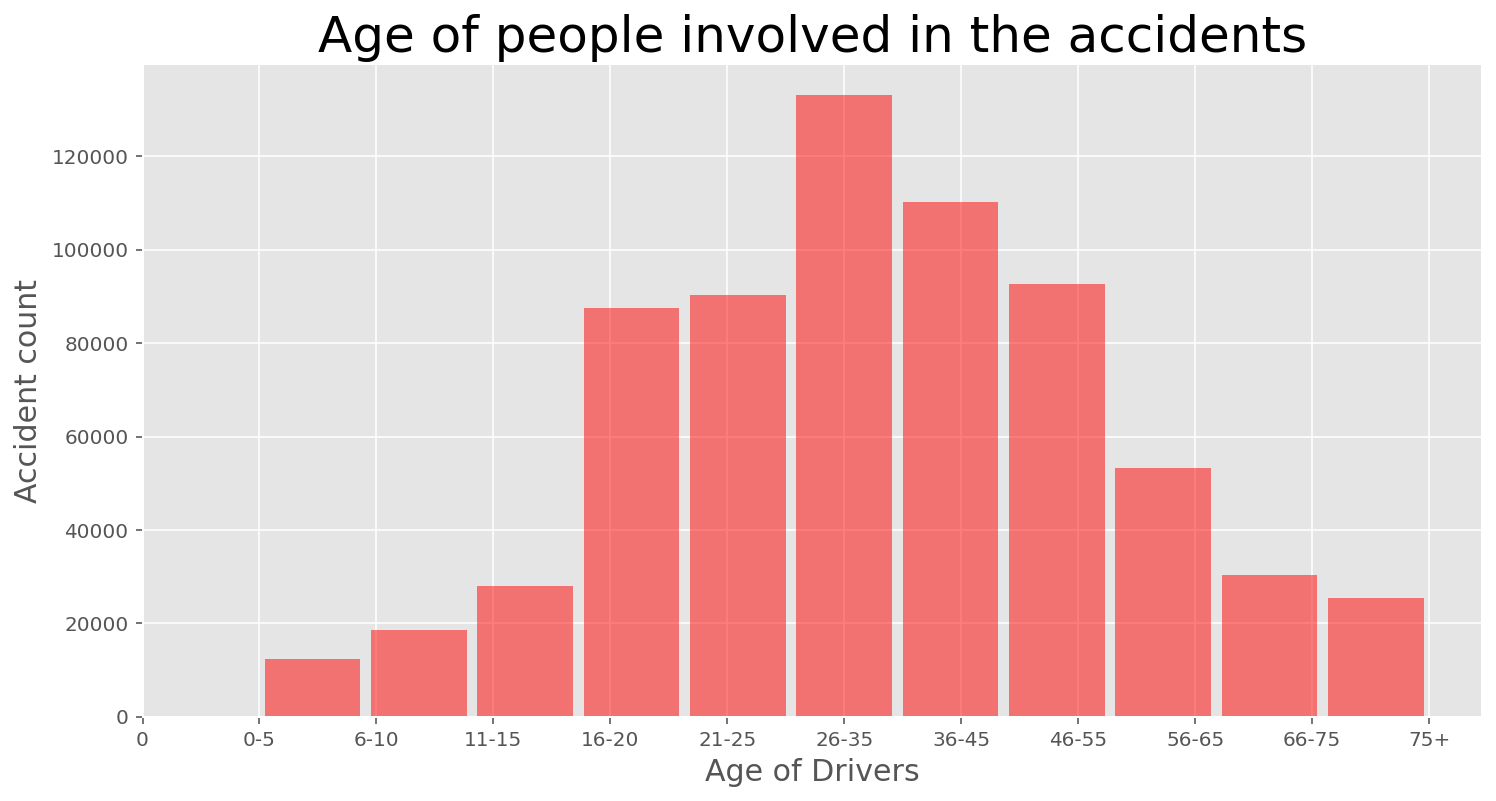

In [ ]:
object = ['0', '0-5', '6-10', '11-15', '16-20', '21-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+'] #연령대 데이터 생성
plt.figure(figsize = (12,6))
casualties['Age_Band_of_Casualty'].hist(bins = 11, alpha = 0.5, rwidth = 0.9, color = 'red')
plt.title('Age of people involved in the accidents', fontsize = 25)
y_pos = np.arange(len(object))
plt.xticks(ticks=y_pos, labels= object) #x축 라벨링
plt.ylabel('Accident count', fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15)
plt.show()

5.4. 속도 제한 구간별 사고건수

In [ ]:
accidents['Speed_limit'].value_counts() #속도별 사고 건수 보기

30    927520
60    238548
40    151387
70    143596
50     60582
20     13156
10         3
Name: Speed_limit, dtype: int64

In [ ]:
speed_zone = accidents.loc[accidents['Speed_limit'].isin(['50','60','70'])] #50, 60, 70 km 였을 때 사고 건수 보기

In [ ]:
speed = accidents['Speed_limit'].value_counts()
speed.values

array([927520, 238548, 151387, 143596,  60582,  13156,      3])

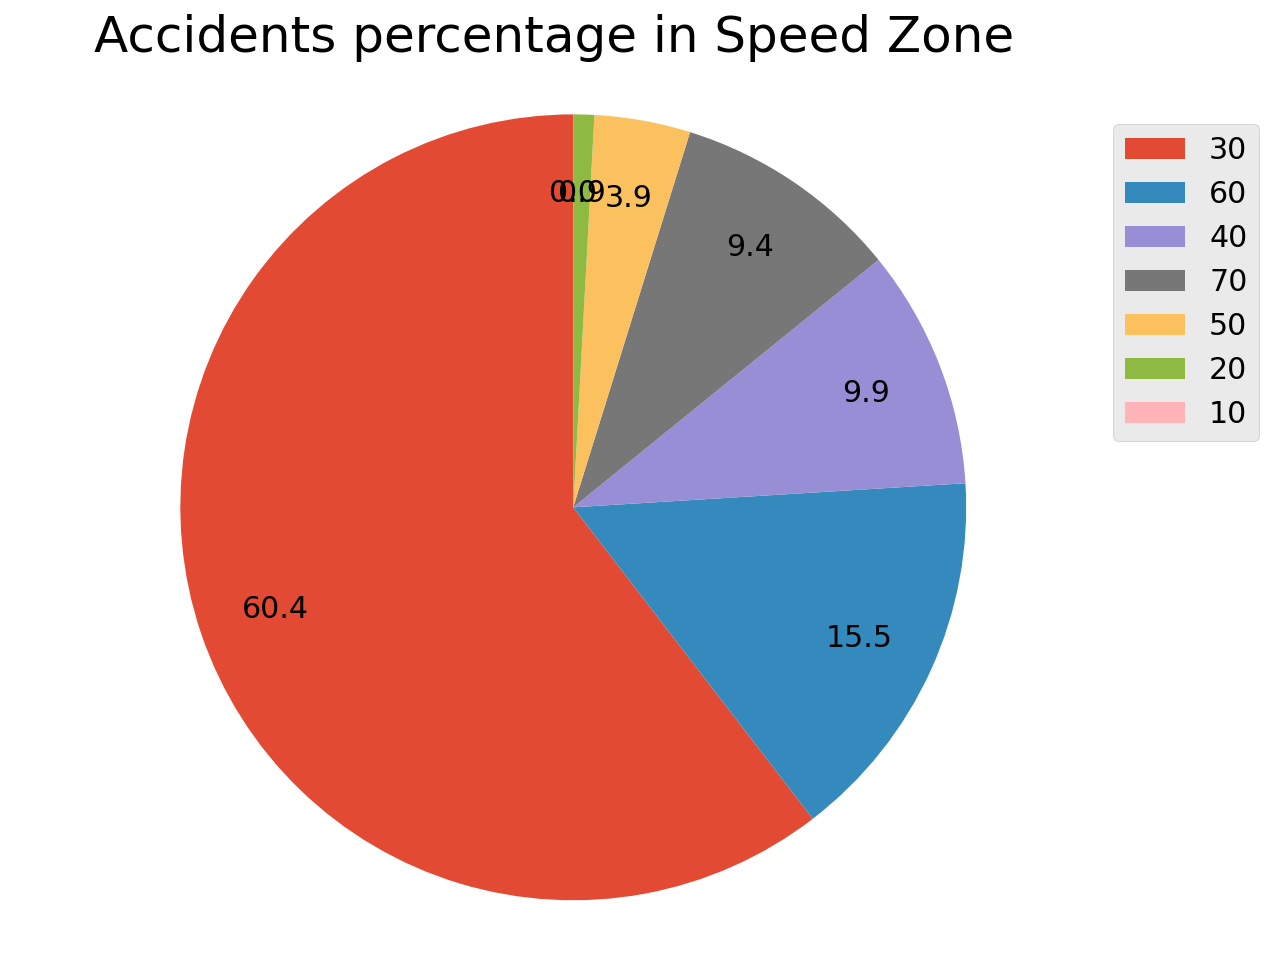

In [ ]:
plt.figure(figsize = (10,8))
plt.pie(speed.values, labels = None, autopct = '%.1f', 
        pctdistance = 0.8, labeldistance = 1.9, shadow = False, startangle = 90, textprops = {'fontsize':15})
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor = (1,0.7), loc = 'center right', fontsize = 15,
           bbox_transform = plt.gcf().transFigure) #범례정보
plt.figtext(.5,.9, 'Accidents percentage in Speed Zone', fontsize = 25, ha = 'center')
plt.show()

5.5. 상관관계

In [ ]:
corr = accidents.corr()
corr

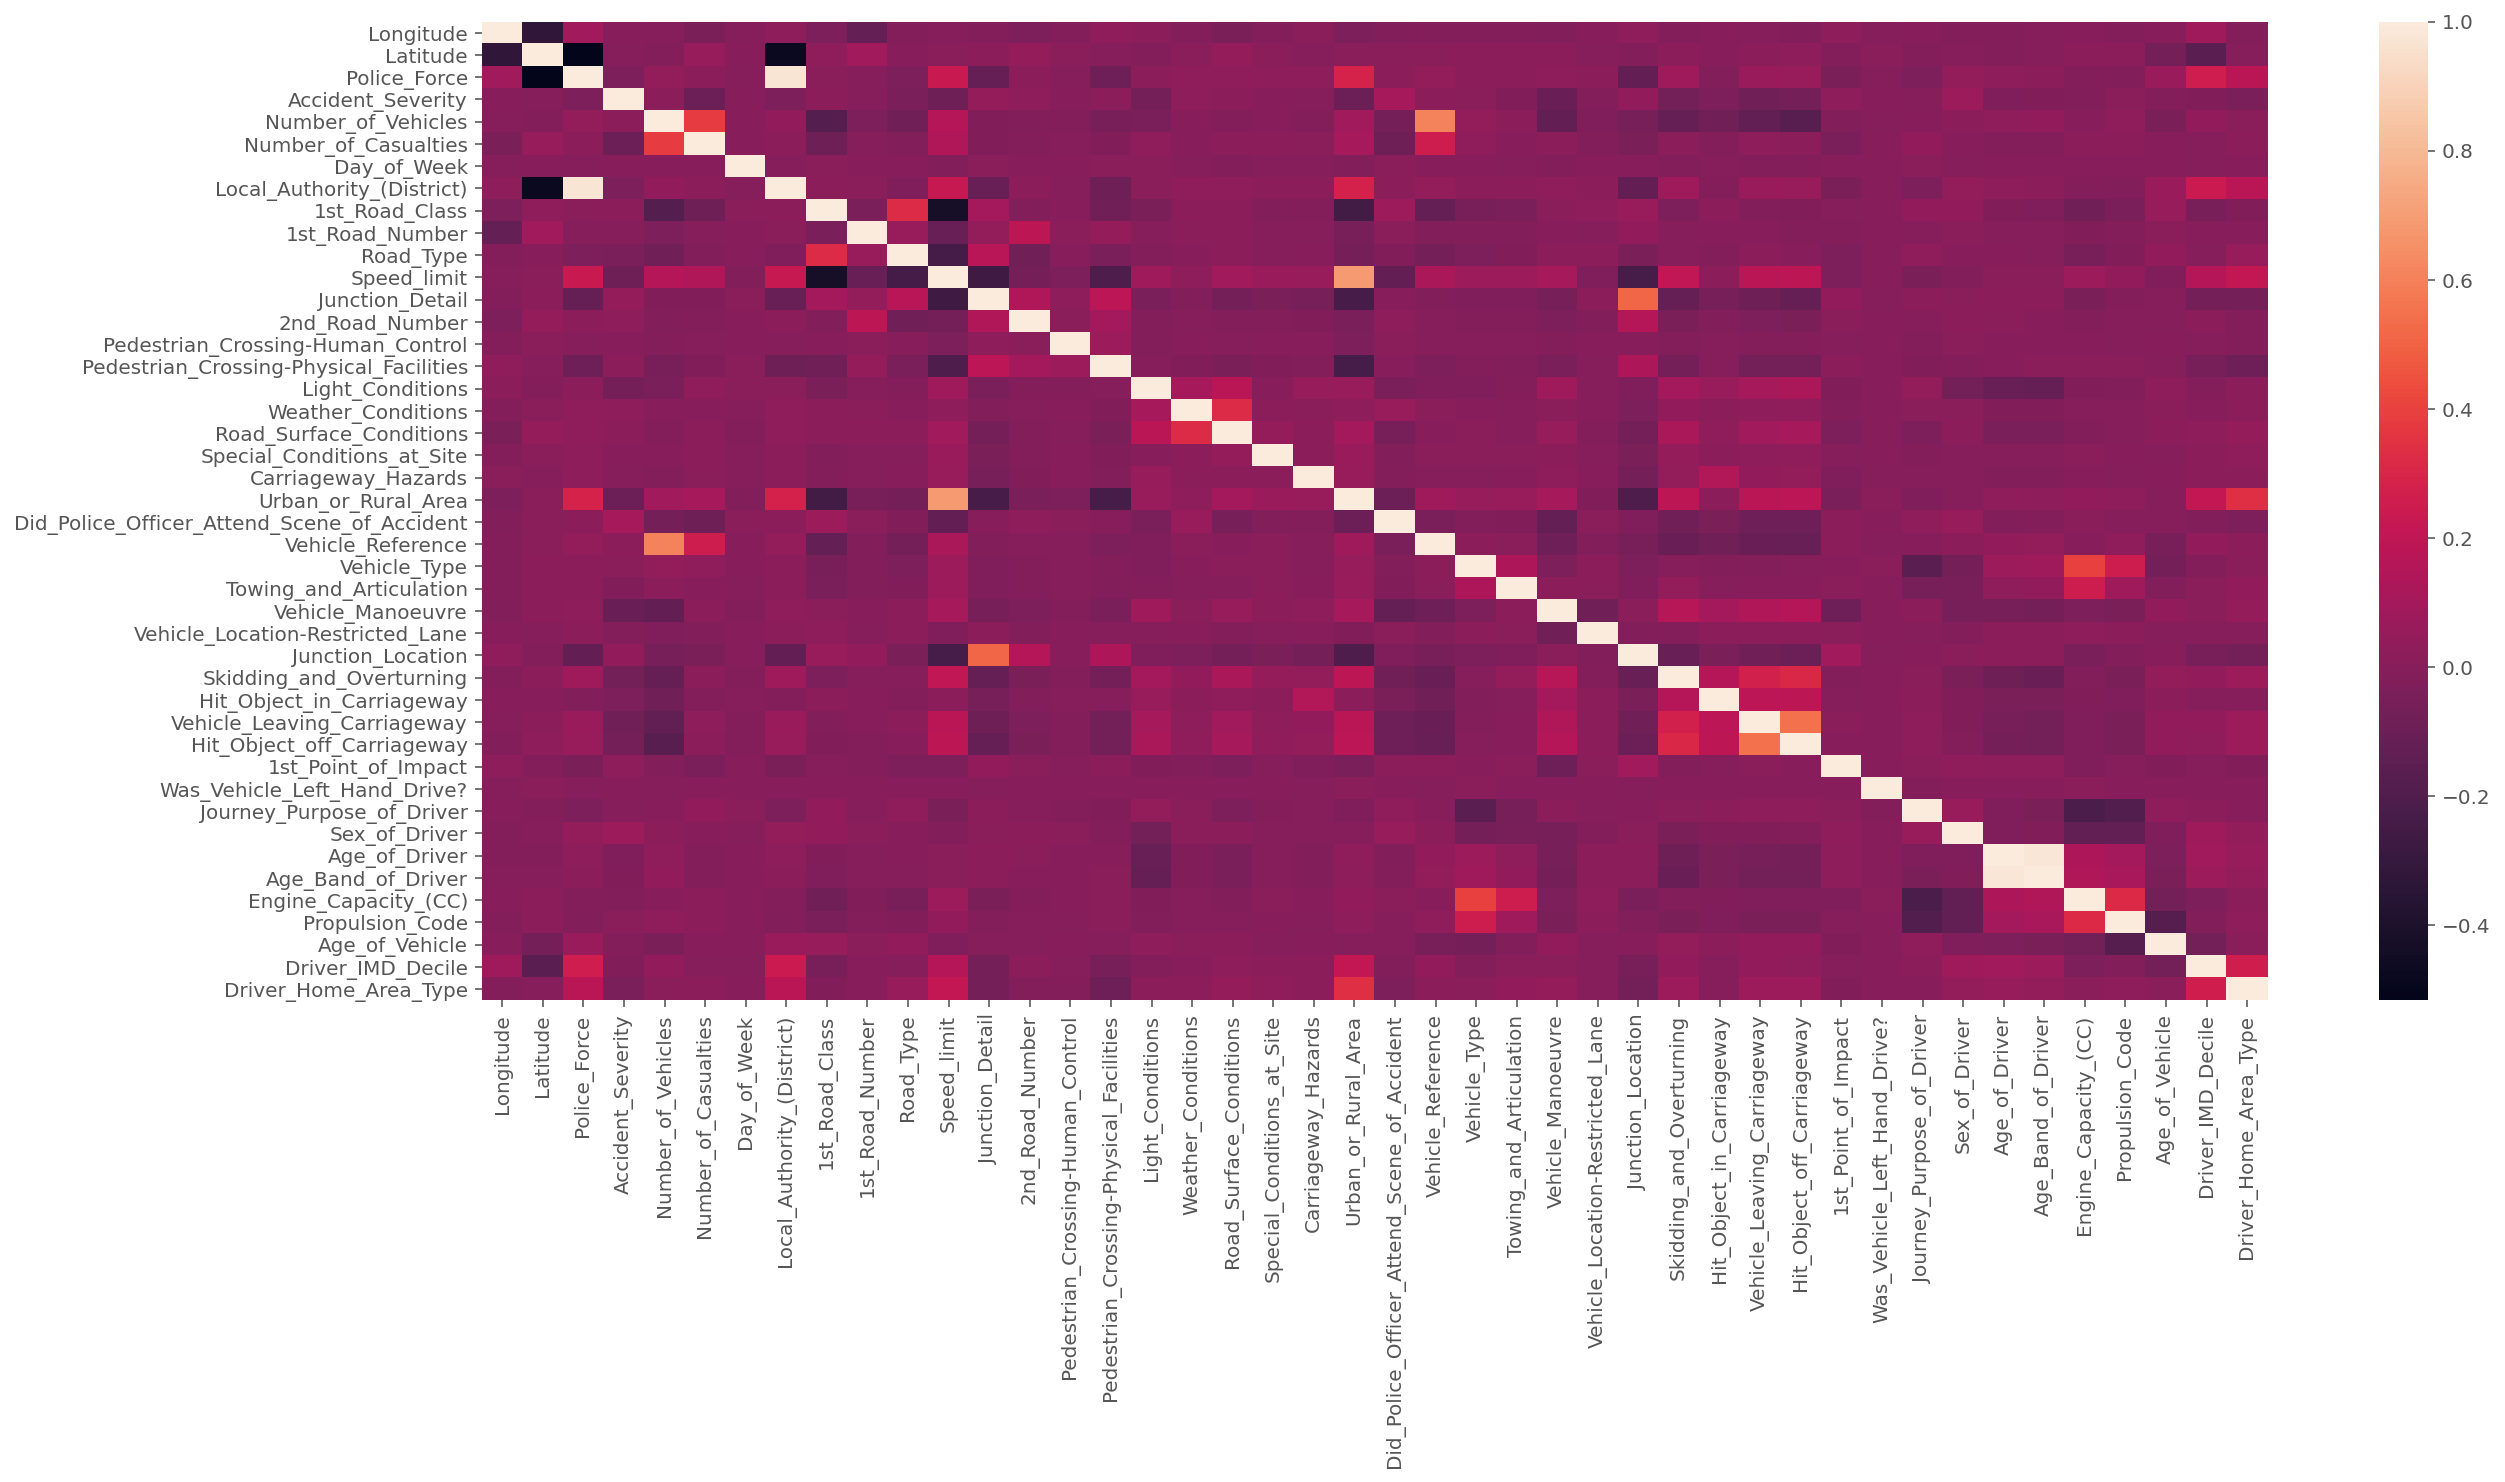

In [ ]:
plt.subplots(figsize = (20,9))
sns.heatmap(corr)
plt.show()

In [ ]:
import sweetviz as sv

In [ ]:
accidents_report = sv.analyze(accidents)

:FEATURES DONE:                    |█████████████████████| [100%]   01:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   44:02  -> (00:00 left)


Creating Associations graph... DONE!


In [ ]:
accidents_report.show_html('SWEETVIZ_REPORT.html')

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.
